<a href="https://colab.research.google.com/github/NelsonKamau/Clustering-images-w-Neural-Network-Bayesian-Opt/blob/main/Clustering_images_w_Neural_Network_%26_Bayesian_Opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://i.imgflip.com/2jxxia.jpg" title="made at imgflip.com">

# Unsupervised Deep Learning

We, data scientists regularly use **DNNs, CNNs and RNNs** for most applications of deep learning but that's only the **supervised side** of the neural networks family but there is also the more sophisticated and less talked about **unsupervised side** which is just as or even more intriguing than the conventional supervised architectures. These unsupervised models enable the neural networks to perform tasks like **clustering, anomaly detection, feature selection, feature extraction, dimensionality reduction and recommender systems**. Some of these neural networks are: **Self organizing maps, Boltzmann machines, Autoencoders**

### Self Organizing Maps
<img src="https://www.researchgate.net/profile/Damian_Jankowski3/publication/291834232/figure/fig3/AS:553741877481472@1509033759154/Self-organizing-map-structure.png">

### Boltzmann Machines
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Boltzmannexamplev1.png/330px-Boltzmannexamplev1.png">

### Autoencoders
<img src="https://cdn-images-1.medium.com/max/1000/1*ZEvDcg1LP7xvrTSHt0B5-Q@2x.png" height="400" width="500">

# Aim
This is supposed to be a tutorial on **Self Organizing Maps** where we will perform clustering on Fashion MNIST using a neural network.
# Concepts covered
- Self Organizing Maps(For unsupervised deep learning)
- Bayesian Optimization
- Analysis of Self Organized Maps
- Some image processing

# Self Organizing Maps
A self-organizing map (SOM) or self-organizing feature map (SOFM) is a type of artificial neural network (ANN) that is trained using unsupervised learning to produce a low-dimensional (typically two-dimensional), discretized representation of the input space of the training samples, called a map, and is therefore a method to do dimensionality reduction. Self-organizing maps differ from other artificial neural networks as they apply competitive learning as opposed to error-correction learning (such as backpropagation with gradient descent), and in the sense that they use a neighborhood function to preserve the topological properties of the input space.
<img src="http://www.pitt.edu/~is2470pb/Spring05/FinalProjects/Group1a/tutorial/kohonen1.gif">
This makes SOMs useful for visualization by creating low-dimensional views of high-dimensional data, akin to multidimensional scaling. The artificial neural network introduced by the Finnish professor Teuvo Kohonen in the 1980s is sometimes called a Kohonen map or network. The Kohonen net is a computationally convenient abstraction building on biological models of neural systems from the 1970s and morphogenesis models dating back to Alan Turing in the 1950s.
<img src="https://www.nnwj.de/uploads/pics/1_2-kohonon-feature-map.gif">
While it is typical to consider this type of network structure as related to feedforward networks where the nodes are visualized as being attached, this type of architecture is fundamentally different in arrangement and motivation. It has been shown that while self-organizing maps with a small number of nodes behave in a way that is similar to K-means, larger self-organizing maps rearrange data in a way that is fundamentally topological in character.

Source: [Wikipedia](http://https://en.wikipedia.org/wiki/Self-organizing_map)

# Things we can do with Self Organizing Maps
* Visualizing high dimensional data into a low dimensional view which is usually 2D - In this case we have 784 columns because the Fashion MNIST dataset has images of dimensions 28x28 
* Clustering - According to [Wikipedia](https://en.wikipedia.org/wiki/Self-organizing_map): It has been shown that while self-organizing maps with a small number of nodes behave in a way that is similar to K-means, larger self-organizing maps rearrange data in a way that is fundamentally topological in character.
* Anomaly detection - We identify entities whose topological distance to its topological neighbors is significantly higher than all its topological neighbors amongst themselves as anomalies
* Non-linear DImensionality Reduction - For visualization, we convert high-dimensional data into low-dimensional data

# About the dataset: Fashion MNIST
## Context
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others." Zalando seeks to replace the original MNIST dataset.

## Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image. To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix. For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below. 

## Labels
Labels
Each training and test example is assigned to one of the following labels:
* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot 


In [3]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=566880c701674c8e1b977e5f85adb4980bee561c4c85d8d6bc675d21258b3362
  Stored in directory: /root/.cache/pip/wheels/6d/4e/9e/a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
Successfully built minisom


In [4]:
# Loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from minisom import MiniSom
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
import concurrent
import time
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig

In [10]:
pwd

'/content'

In [16]:
# Loading training and test set
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colaba Notebooks/Clustering images Neural Network & Bayesian Opt/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/My Drive/Colaba Notebooks/Clustering images Neural Network & Bayesian Opt/'
/content/drive/My Drive/Colab Notebooks/Clustering images Neural Network & Bayesian Opt


In [17]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Combining training and test set to get over 70k samples
new_train = train.drop(columns=['label'])
new_test = test.drop(columns=['label'])
som_data = pd.concat([new_train, new_test], ignore_index=True).values
labels = pd.concat([train['label'], test['label']], ignore_index=True).values

In [19]:
labels

array([2, 9, 6, ..., 8, 8, 1])

# Some sample images

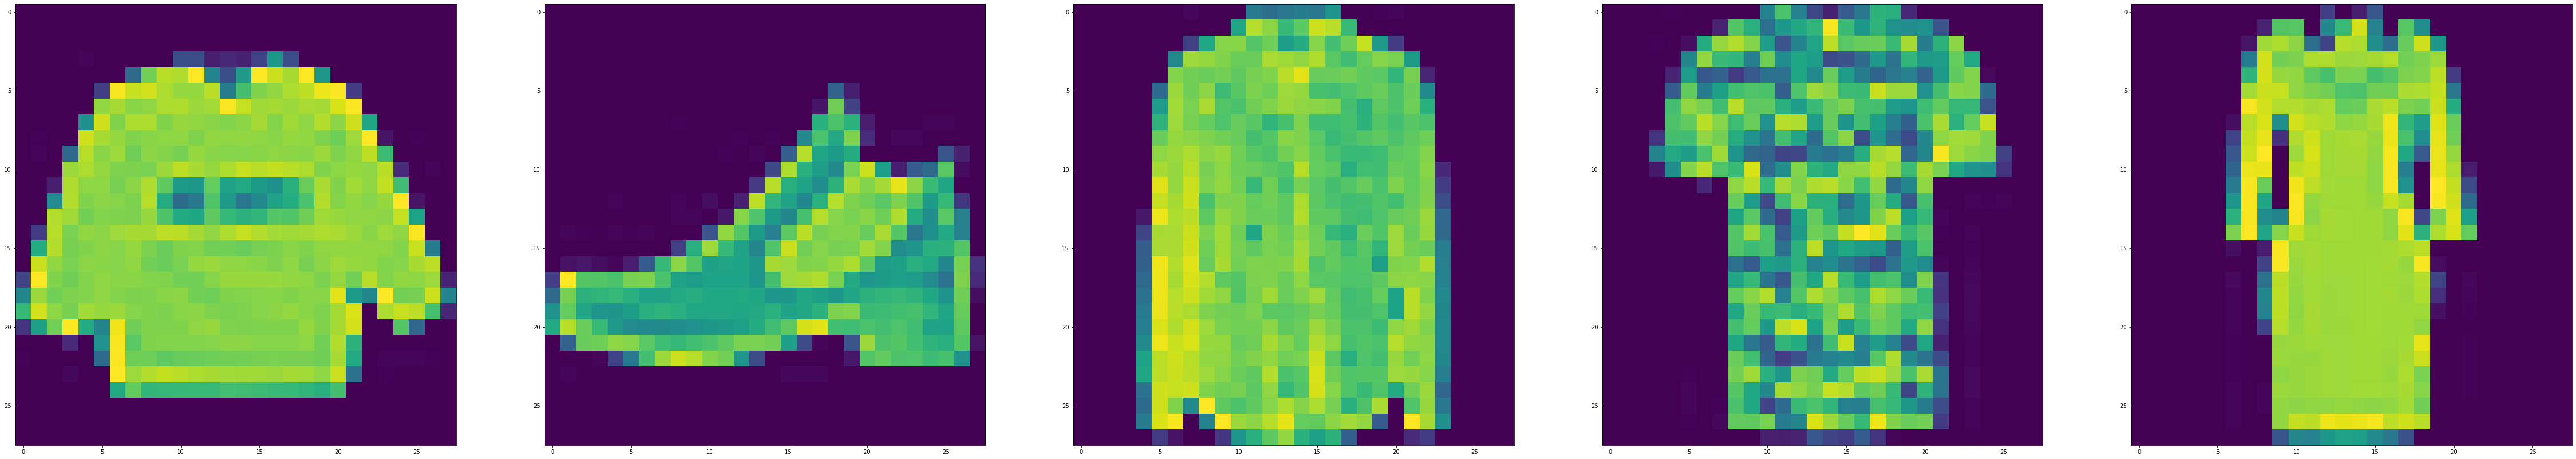

In [20]:
fig, ax = plt.subplots(1, 5)
fig.set_size_inches(80, 40)
for i in range(5):
  ax[i].imshow(som_data[i].reshape(28, 28))

plt.show()

## Minisom: A minimalistic implementation of Self Organizing Maps
MiniSom is a minimalistic and Numpy based implementation of the Self Organizing Maps (SOM). SOM is a type of Artificial Neural Network able to convert complex, nonlinear statistical relationships between high-dimensional data items into simple geometric relationships on a low-dimensional display.
Source: [GitHub](https://github.com/JustGlowing/minisom)

In [21]:
#Initializing the map
start_time = time.time()
# The map will have x*y = 50*50 = 2500 features  
som = MiniSom(x=50,y=50,input_len=som_data.shape[1],sigma=0.5,learning_rate=0.4)
# There are two ways to train this data
# train_batch: Data is trained in batches
# train_random: Random samples of data are trained. Following line of code provides random weights as we are going to use train_random for training
som.random_weights_init(som_data)

In [22]:
# Training data for 1000 iterations
som.train_random(data=som_data, num_iteration=1000)

Now, we will plot the map. First, we will manually define labels with their markers.
* 0 -> Light blue circle - T-shirt/top
* 1 -> Caramel square- Trouser
* 2 -> Blue pentagon - Pullover
* 3 -> Orange star - Dress
* 4 -> Tomato red triangle - Coat
* 5 -> Bright cyan tri_down - Sandal
* 6 -> Electric indigo hexagon - Shirt
* 7 -> Light orange x - Sneaker
* 8 -> Raspberry plus - Bag
* 9 -> Purple diamond - Ankle Boot

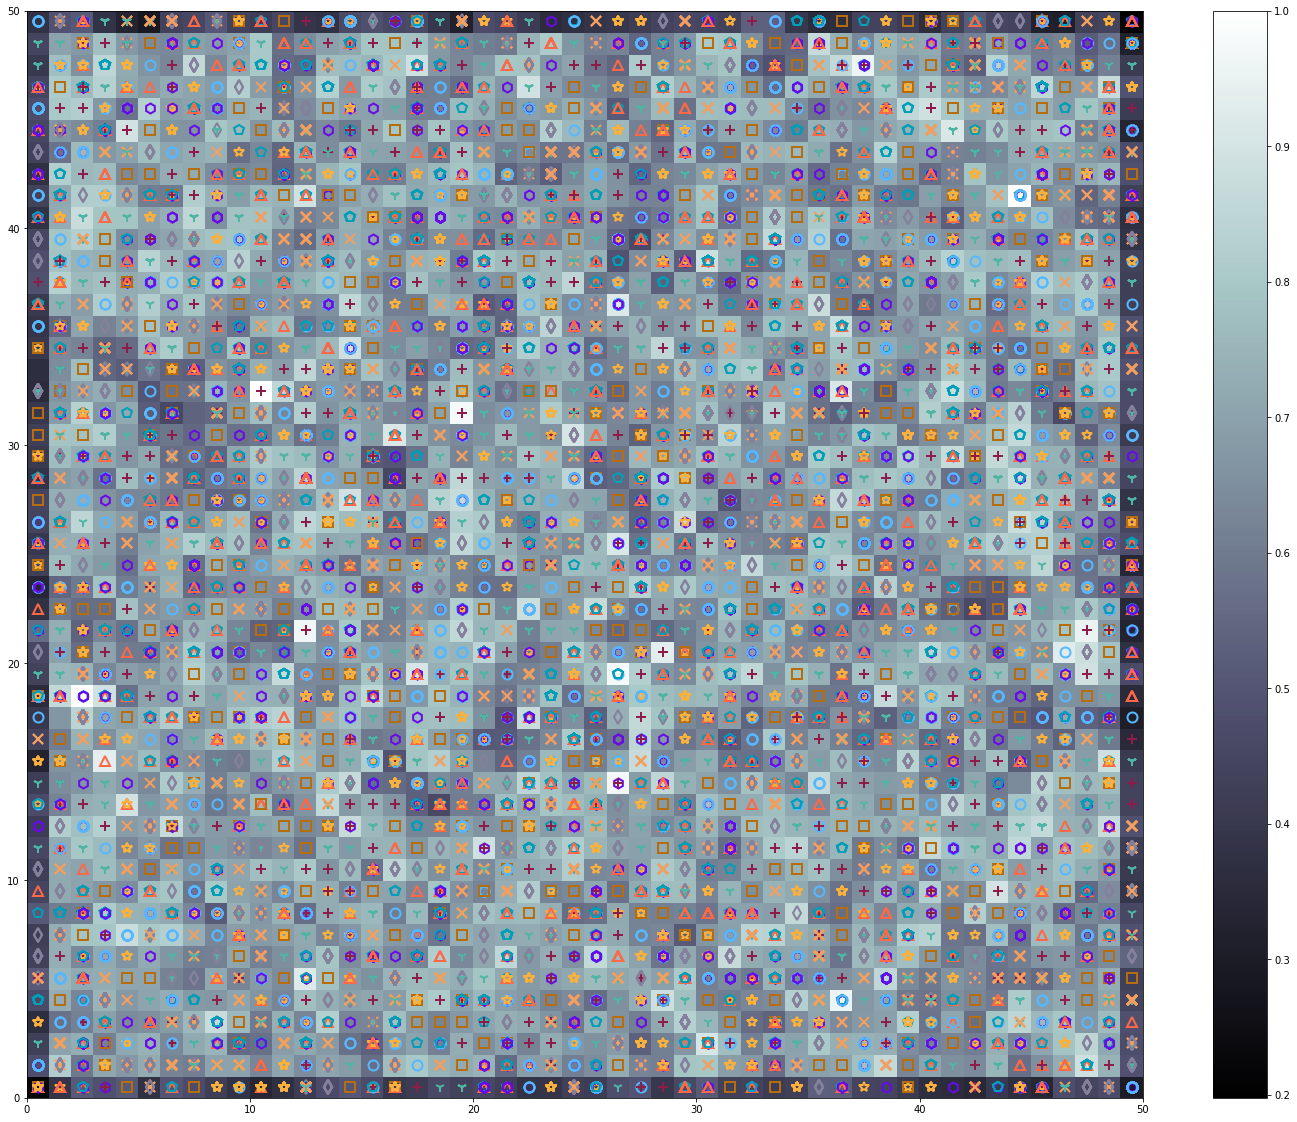

In [23]:
# Finally plotting the map
with concurrent.futures.ProcessPoolExecutor() as executor:
    rcParams['figure.figsize'] = 25, 20
    bone()
    pcolor(som.distance_map().T)
    colorbar()
    markers = ['o','s','p','*','^','1','h','x','+','d']
    colors = ['#57B8FF','#B66D0D','#009FB7','#FBB13C','#FE6847','#4FB5A5','#670BE8','#F29F60','#8E1C4A','#85809B']
    for i,x in enumerate(som_data):
        w = som.winner(x)
        plot(w[0]+0.5,w[1]+0.5,markers[labels[i]],markeredgecolor=colors[labels[i]],markerfacecolor='None',markersize=10,markeredgewidth=2)
    savefig("map.png")
    show()
end_time = time.time() - start_time

In [24]:
print(int(end_time), 'seconds taken to complete the task')

998 seconds taken to complete the task


# How to interpret and evaluate a Self Organizing Map
* **Again, a Self Organizing Map creates a view that represents high dimensional data as low dimensional data preserving topological properties of the input space using a neighborhood function** 
* The heatmap in the background on which the clusters reside represent the topological properties of the input space. The colorbar() on the right represent the topological distance. The distance goes from **0(black) to 1(white) where lesser the distance, more is the correlation/similarity of the feature with its immediate neighboring features**.
* If the feature is white i.e., **topological distance close to 1, then they can be classified as anomalies**.
* The markers(colored shapes) represent different labels and are clustered on the topological space on the basis of their topological properties.
* Our goal is to have distinct clusters but that doesn't mean all the points of the cluster have to be close to each other because this is non-linear dimensionality reduction and not K-means clustering where points are located close to the centroids
* For better evaluation, we have to take care that any **given feature should be occupied by only one label/marker. We should optimize the map for the same.** 
* Overlap of mutiple labels on a feature means its uniqueness is compromised and there is a scope of improvement.

# The interpretation

Each time the map is generated different but these are my observations from maps in different versions.

 - Clearly more optimization is required as there is much overlap of weights
 - Most anomalies/outliers have the bright cyan three-pronged star(tri_down) label associated with them which is a Sandal
 - Most of the X, diamonds and three-pronged stars overlap with each other so they have similar features which is expected as these are all kinds of footwear i.e., sneakers, ankle boots and sandals respectively
 - Brown squares i.e., trousers have the most distinct and well-formed clusters with minimal overlapping and a significant number of features covered
 - Plus sign i.e., bag is not mapped on much features which means that many features have been extracted for bags 
 - circles, pentagons and hexagons overlap with each other a lot and this is expected as they are T-shirts, pullovers and shirts respectively and so are expected to have similar features.
 - Star(dress) and triangle(coat) are the labels that overlap a lot with other labels
 - Much more than half of the extracted features have the following labels: Sneakers(X), Shirts(Hexagon), Trousers(Square), T-shirts/tops(Circle)

Many more things can be interpreted but these are just some easily discovered observations.

# Analyzing the results
**Minisom objects provide us with enough data to perform good analysis of our results and gain more insights**

In [25]:
start_time = time.time()
# Returns a matrix where the element i,j is the number of time that the neuron i,j have been winner.
act_res = som.activation_response(som_data)
# Returns a dictionary wm where wm[(i,j)] is a list with all the patterns that have been mapped in the position i,j.
winner_map = som.win_map(som_data)
# Returns a dictionary wm where wm[(i,j)] is a dictionary that contains the number of samples from a given label that have been mapped in position i,j.
labelmap = som.labels_map(som_data,labels)
end_time = time.time() - start_time
print(int(end_time),"seconds taken to extract data from results.")

2015 seconds taken to extract data from results.


## Heatmap for performance of neurons
We will use *act_res* to generate a heatmap which indicates the neurons which perform better than others.
**Colour given to a neuron represents the number of times it has been winner. Lighter colour shade is directly proportional to this frequency of winning.**

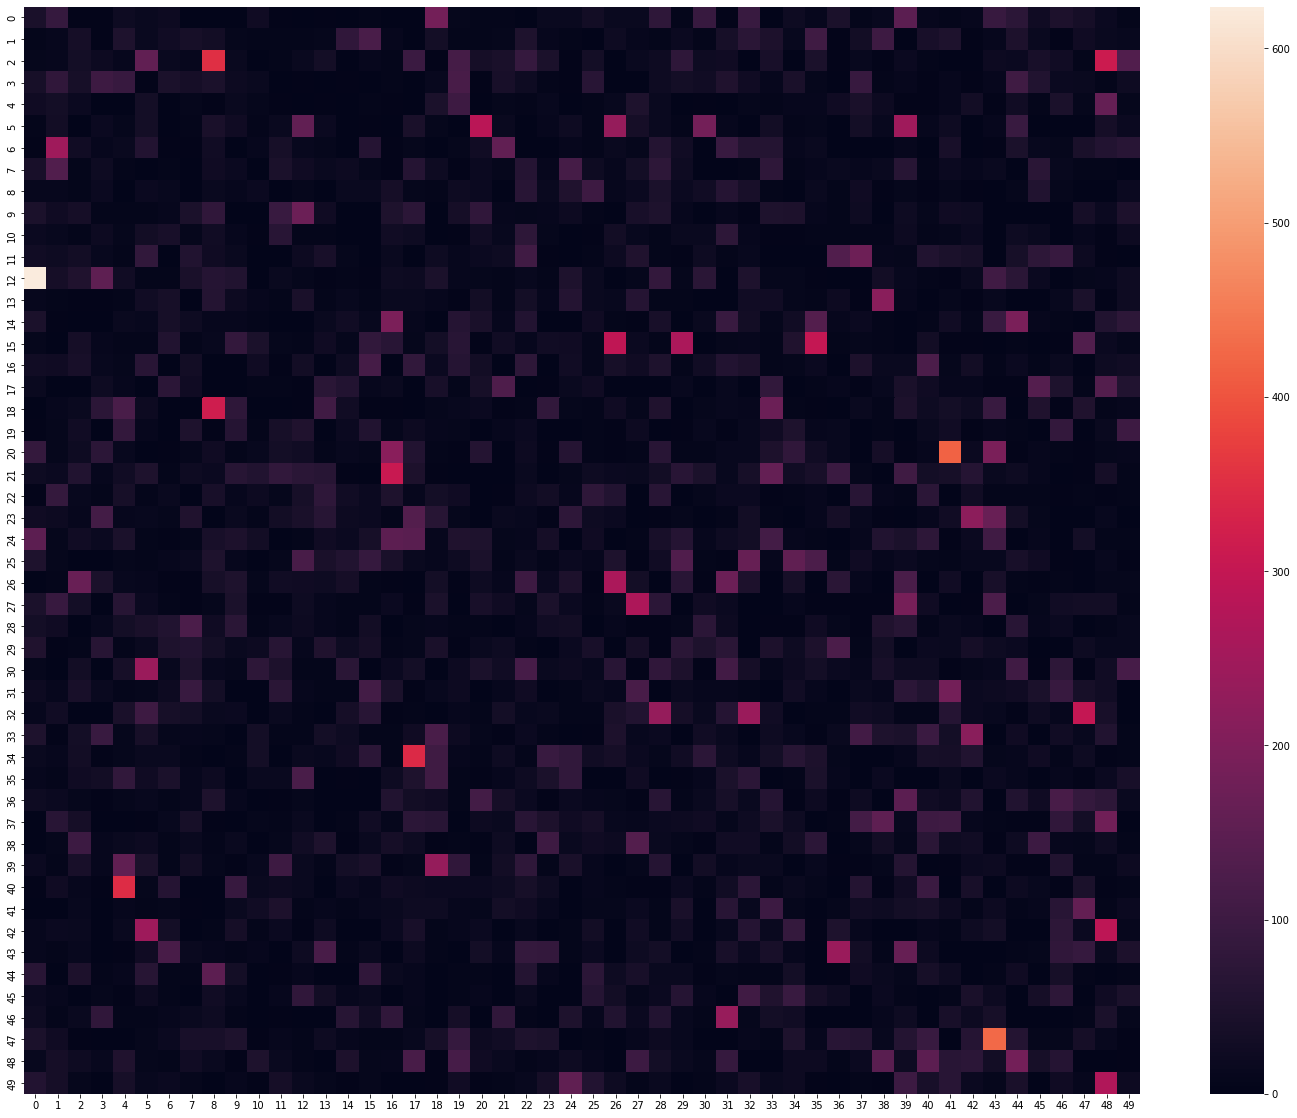

In [26]:
sns.heatmap(act_res)

## Distribution of outlier neurons

In [27]:
# Extracting outliers
q75, q25 = np.percentile(act_res.flatten(), [75, 25])
iqr = q75 - q25
lower_fence = q25 - (1.5*iqr)
upper_fence = q75 - (1.5*iqr)
condition = (act_res < lower_fence) | (act_res > upper_fence)
outlier_neurons = np.extract(condition, act_res)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


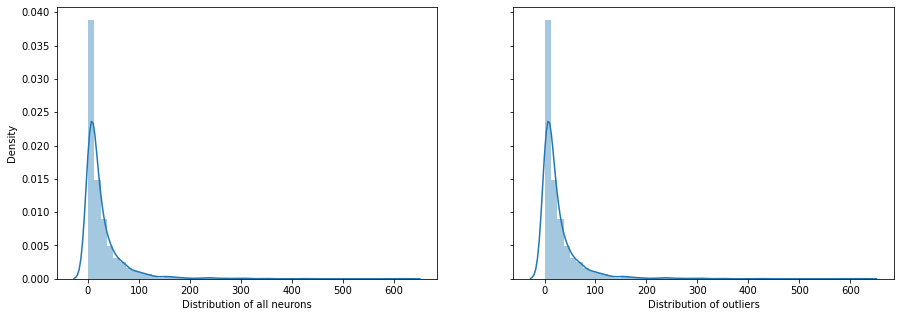

In [28]:
# Plotting the distribution of neurons and outliers
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))
ax1.set(xlabel='Distribution of all neurons')
ax2.set(xlabel='Distribution of outliers')
sns.distplot(act_res.flatten(), ax=ax1)
sns.distplot(outlier_neurons, ax=ax2)
plt.close(2)
plt.close(3)

## Visualizing patterns 
*winner_map* contains dominant features/patterns generated by neurons. Some of these features if visualized look like amalgamation of different kinds of clothes.
Like a generated feature may generate images that look like the combination of shirts, coats and pullovers. This may help in clustering

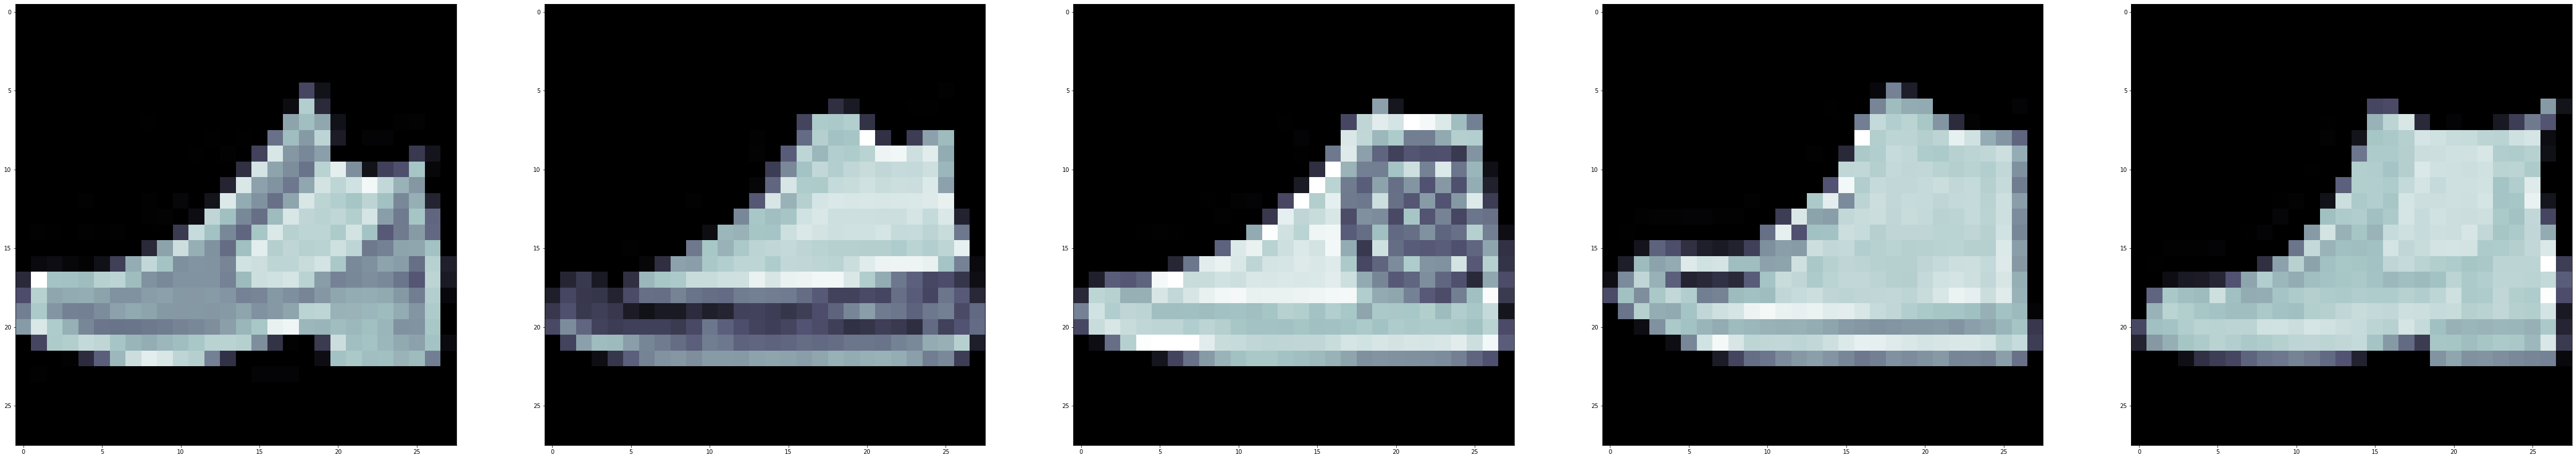

In [29]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    ax[i].imshow(winner_map[list(winner_map)[1]][i].reshape(28, 28))
plt.show()

## Bayesian Optimization
Bayesian optimization is a sequential design strategy for global optimization of black-box functions that doesn't require derivatives. Since the objective function is unknown, the Bayesian strategy is to treat it as a random function and place a prior over it. The prior captures our beliefs about the behaviour of the function. After gathering the function evaluations, which are treated as data, the prior is updated to form the posterior distribution over the objective function. The posterior distribution, in turn, is used to construct an acquisition function (often also referred to as infill sampling criteria) that determines what the next query point should be.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Bayesian_optimization)

## Hyperopt: A great library for Bayesian Optimization
Hyperopt is a Python library for serial and parallel optimization over awkward search spaces, which may include real-valued, discrete, and conditional dimensions. According to GitHub, it is "Distributed Asynchronous Hyper-parameter Optimization".
Source: [GitHub](https://github.com/hyperopt/hyperopt)

**The sigma parameter can have a lot of impact on the clustering in the map as it is essentially the spread of the neighborhood function. So, we will optimize the sigma function to minimize the quantization error(```quantization_error``` - A MiniSom method that returns the quantization error computed as the average distance between each input sample and its best matching unit.).**

```fmin``` - For minimizing the parameter

```Trials``` - To really see the purpose of returning a dictionary, let's modify the objective function to return some more things, and pass an explicit trials argument to fmin.

```hp``` - Objective function for defining the search space

```tpe``` - Algorithm used for optimization

**We will have the training and test set contain only '4s' and '8s' as optimization for all labels will take a lot of time. At the end of the day, this is just a example to get you all to know about great libraries like 'MiniSom' and'Hyperopt'.**

In [30]:
# Reorganizing the data
train = train[(train.label == 4) | (train.label == 8)]
test = test[(test.label == 4) | (test.label == 8)]

opt_train = train.drop(['label'],axis=1)
opt_test = test.drop(['label'],axis=1)
opt_data = pd.concat([opt_train, opt_test], ignore_index=True).values
labels = pd.concat([train['label'], test['label']], ignore_index=True).values

In [31]:
# Setting some parameters in advance
x = y = 10
input_len = opt_data.shape[1]
sigma = 1.0
learning_rate = 0.5
iterations = 1000

In [32]:
# Now, a function to plot maps
def make_map(x,y,input_len,sigma,learning_rate,iterations):
    som = MiniSom(x=x,y=y,input_len=input_len,sigma=sigma,learning_rate=learning_rate)
    som.random_weights_init(opt_data)
    som.train_random(data=opt_data,num_iteration=iterations)
    with concurrent.futures.ProcessPoolExecutor() as executor:
        rcParams['figure.figsize'] = 10, 8
        bone()
        pcolor(som.distance_map().T)
        colorbar()
        markers = ['o','s','p','*','^','1','h','x','+','d']
        colors = ['#57B8FF','#B66D0D','#009FB7','#FBB13C','#FE6847','#4FB5A5','#8C9376','#F29F60','#8E1C4A','#85809B']
        for i,x in enumerate(opt_data):
            w = som.winner(x)
            plot(w[0]+0.5,w[1]+0.5,markers[labels[i]],markeredgecolor=colors[labels[i]],markerfacecolor='None',markersize=12,markeredgewidth=2)
        show()

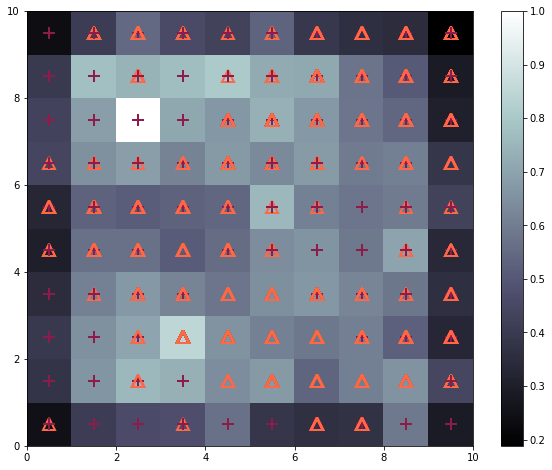

In [33]:
# A simple unoptimized map
make_map(x,y,input_len,sigma,learning_rate,iterations)

**Well, we can certainly have more defined clusters through optimization.**

In [34]:
# This will optimize sigma to minimize the quantization error
best_params = fmin(
    fn = lambda sig: MiniSom(x=x,y=y,input_len=input_len,sigma=sigma,learning_rate=learning_rate).quantization_error(opt_data),
    space = hp.uniform("sig",0.0009,x/2.0001),
    algo = tpe.suggest,
    verbose=1,
    max_evals = 50)
print("The best sigma value after 50 iterations is {}".format(best_params['sig']))

100%|██████████| 50/50 [00:25<00:00,  1.93it/s, best loss: 3644.1064043698457]
The best sigma value after 50 iterations is 0.7851655584381982


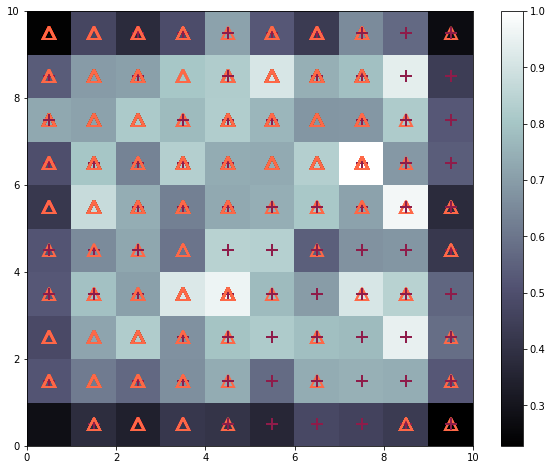

In [35]:
# Let's see the new optimized map
make_map(x,y,input_len,best_params['sig'],learning_rate,iterations)

As weights are random, every time the map is generated different. I got great distinguished clusters while I was coding with little overlapping. Overlapping should be minimal but minute to no overlapping means the features are very distinguished and images of both labels have little to nothing in common which is not really true in this case.

Now, I will try optimizing two parameters with Hyperopt.

In [36]:
space = {
    'sig': hp.uniform('sig',0.001,5.0),
    'learning_rate': hp.uniform('learning_rate',0.001,0.5)
}

def opt_map(space):
    sig = space['sig']
    learning_rate = space['learning_rate']
    val = MiniSom(x=x,y=y,input_len=input_len,sigma=sigma,learning_rate=learning_rate).quantization_error(opt_data)
    #print("Now,the quantization error is {}\n".format(val))
    return {'loss':val, 'status':STATUS_OK}

trials = Trials()
best_params = fmin(fn=opt_map,space=space,algo=tpe.suggest,max_evals=50,trials=trials)
print("The best sigma value after 50 iterations is {}".format(best_params['sig']))
print("The best learning_rate after 50 iterations is {}".format(best_params['learning_rate']))

100%|██████████| 50/50 [00:23<00:00,  2.16it/s, best loss: 3644.1055973564908]
The best sigma value after 50 iterations is 2.5350479354842705
The best learning_rate after 50 iterations is 0.2121681512007086


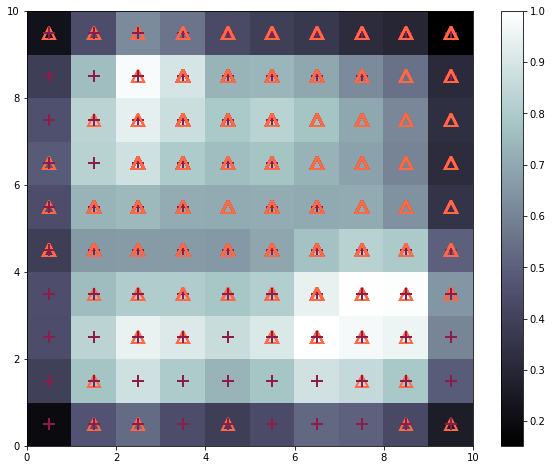

In [37]:
# The more optimized map 
make_map(x,y,input_len,best_params['sig'],best_params['learning_rate'],iterations)

Maybe this is not the most optimized map but you can always fork this kernel to play with parameters and fully optimize this implementation.